In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Swiler's file paths for each dataset
gdp_data = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/GDP.csv', parse_dates=['DATE'])
cpat_tax = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/CPATAX.csv', parse_dates=['DATE'])
durable_goods = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/manufacturers_new_orders_durable_goods_excluding_defense.csv', parse_dates=['DATE'])
housing_starts = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/housing start.csv', parse_dates=['DATE'])
industrial_production = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/industrial_production_total_index.csv', parse_dates=['DATE'])
personal_consumption = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/PCECTPI.csv', parse_dates=['DATE'])
t10y2y = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/T10Y2Y.csv', parse_dates=['DATE'])
sp500_vix = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/sp500_vix_quarterly.csv', parse_dates=['Date'])
gtrend_recession = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/gtrend_recession.csv', parse_dates=['Month'])
gtrend_unemployment = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/gtrend_unemployment.csv', parse_dates=['Month'])
nonderiv_insider_activity = pd.read_csv('/Users/swilerboyd/Documents/GitHub/cs526_proj/datasets/quarterly/nonderiv_insider_activity.csv', parse_dates=['transactionDate'])

In [ ]:
#Henry's file paths for each dataset

In [5]:
# Merge datasets on their respective date columns
data = gdp_data.copy()  # Start with GDP data

# Merge other datasets using 'DATE' or appropriate columns
data = data.merge(cpat_tax, on='DATE', how='left')
data = data.merge(durable_goods, on='DATE', how='left')
data = data.merge(housing_starts, on='DATE', how='left')
data = data.merge(industrial_production, on='DATE', how='left')
data = data.merge(personal_consumption, on='DATE', how='left')
data = data.merge(t10y2y, on='DATE', how='left')
data = data.merge(sp500_vix.rename(columns={'Date': 'DATE'}), on='DATE', how='left')
data = data.merge(gtrend_recession.rename(columns={'Month': 'DATE'}), on='DATE', how='left')
data = data.merge(gtrend_unemployment.rename(columns={'Month': 'DATE'}), on='DATE', how='left')
data = data.merge(nonderiv_insider_activity.rename(columns={'transactionDate': 'DATE'}), on='DATE', how='left')

#print
print(data.head(50))

          DATE        GDP    CPATAX         ADXDNO        HOUST  IPB50001SQ  \
260 2012-01-01  16068.805  1758.696  212731.333333   707.333333     96.7955   
261 2012-04-01  16207.115  1729.414  206685.333333   739.333333     97.3957   
262 2012-07-01  16319.541  1705.305  201205.333333   780.333333     97.3889   
263 2012-10-01  16420.419  1699.163  207385.666667   908.000000     97.8760   
264 2013-01-01  16648.189  1699.634  215607.666667   953.333333     98.6214   
265 2013-04-01  16728.687  1703.325  225400.666667   868.000000     99.0683   
266 2013-07-01  16953.838  1720.440  215417.666667   882.333333     99.4698   
267 2013-10-01  17192.019  1751.490  227841.666667  1009.000000    100.1453   
268 2014-01-01  17197.738  1652.642  219381.000000   934.000000    100.8268   
269 2014-04-01  17518.508  1801.772  221663.000000   987.000000    102.2146   
270 2014-07-01  17804.228  1889.023  247268.333333  1030.666667    102.7898   
271 2014-10-01  17912.079  1880.338  217766.333333  

In [24]:
# Create a recession indicator
data['GDP_diff'] = data['GDP'].diff()
data['Recession'] = np.where(data['GDP_diff'] < 0, 1, 0)

# Count the total number of recession periods
recession_count = data['Recession'].sum()

print(f"The U.S. has experienced {recession_count} recession periods based on GDP declines.")

# Filter the dataset for recession periods
recession_periods = data[data['Recession'] == 1][['DATE', 'GDP']]

# Print the recession periods
print("Recession periods based on GDP decline:")
print(recession_periods)

The U.S. has experienced 19 recession periods based on GDP declines.
Recession periods based on GDP decline:
          DATE        GDP
8   1949-01-01    275.034
9   1949-04-01    271.351
11  1949-10-01    270.627
26  1953-07-01    391.171
27  1953-10-01    385.970
28  1954-01-01    385.345
43  1957-10-01    474.864
44  1958-01-01    467.540
53  1960-04-01    541.080
55  1960-10-01    540.197
140 1982-01-01   3274.302
175 1990-10-01   6004.733
218 2001-07-01  10598.020
244 2008-01-01  14706.538
247 2008-10-01  14608.209
248 2009-01-01  14430.902
249 2009-04-01  14381.236
292 2020-01-01  21727.657
293 2020-04-01  19935.444


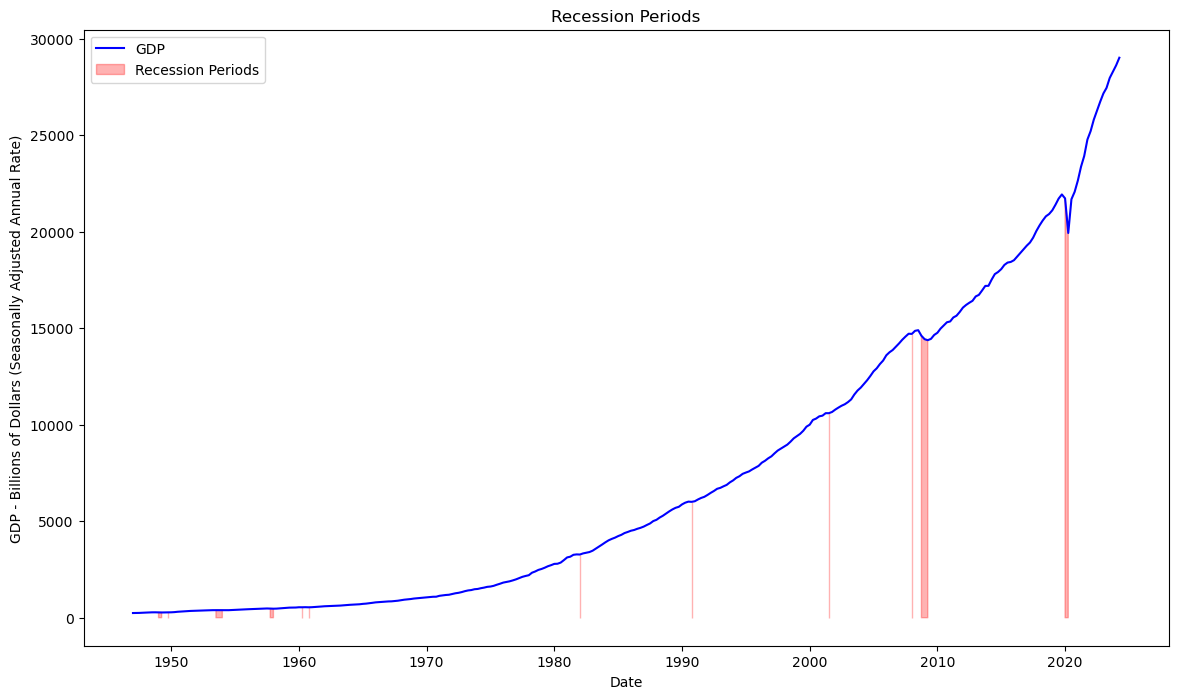

In [10]:
# Plot Recessions 
plt.figure(figsize=(14, 8))
plt.plot(data['DATE'], data['GDP'], label='GDP', color='blue')
plt.fill_between(data['DATE'], data['GDP'], where=data['Recession'] == 1, color='red', alpha=0.3, label='Recession Periods')
plt.title('Recession Periods')
plt.xlabel('Date')
plt.ylabel('GDP - Billions of Dollars (Seasonally Adjusted Annual Rate)')
plt.legend()
plt.show()

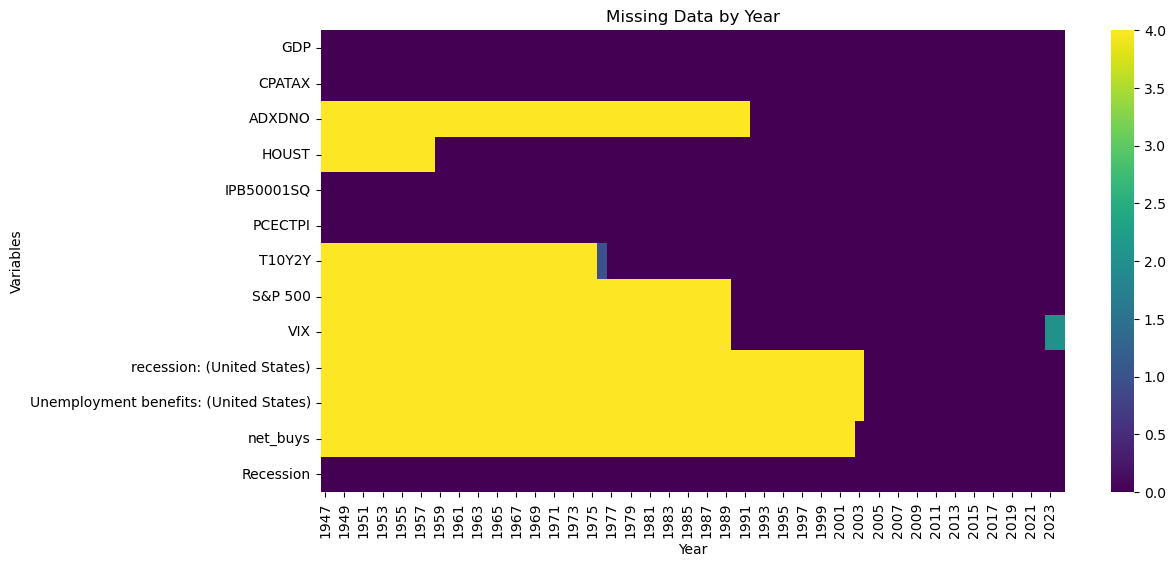

In [25]:
# Ensure the date column is in datetime format
data['Year'] = data['DATE'].dt.year  # Extract year from 'DATE' column

# Calculate missing values by year
missing_by_year = data.groupby('Year').apply(lambda x: x.isnull().sum())

# Drop the 'DATE' or other non-numeric columns from the missing data count
missing_by_year.drop(['DATE', 'Year', 'GDP_diff'], axis=1, inplace=True, errors='ignore')

plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_year.T, cmap='viridis', cbar=True)
plt.title('Missing Data by Year')
plt.xlabel('Year')
plt.ylabel('Variables')
plt.show()

